In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sts
from numpy import sqrt
import statsmodels.api as sm
import statistics as st
from scipy.stats import kstest

In [3]:
data = pd.read_csv('insurance.csv')

In [4]:
data.head

<bound method NDFrame.head of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [21]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<function matplotlib.pyplot.show(close=None, block=None)>

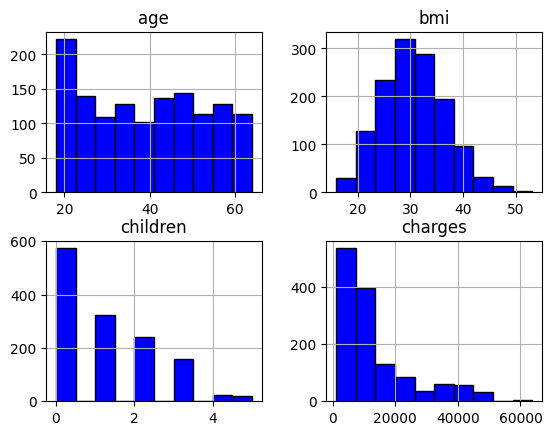

In [5]:
data.hist(color = 'blue', edgecolor = 'black')
plt.show

In [7]:
mean = np.mean(data['bmi'])
moda = sts.mode(data['bmi'])
med = np.median(data['bmi'])
print('Среднее = %f'%mean)
print('Мода :', moda)
print('Медина = %f'%med)

Среднее = 30.663397
Мода : ModeResult(mode=array([32.3]), count=array([13]))
Медина = 30.400000


C:\Users\Учеба\AppData\Local\Temp\ipykernel_4352\1246439222.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  moda = sts.mode(data['bmi'])


In [8]:
mean1 = np.mean(data['charges'])
moda1 = sts.mode(data['charges'])
med1 = np.median(data['charges'])
print('Среднее = %f'%mean1)
print('Мода :', moda1)
print('Медина = %f'%med1)

Среднее = 13270.422265
Мода : ModeResult(mode=array([1639.5631]), count=array([2]))
Медина = 9382.033000


C:\Users\Учеба\AppData\Local\Temp\ipykernel_4352\843449326.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  moda1 = sts.mode(data['charges'])


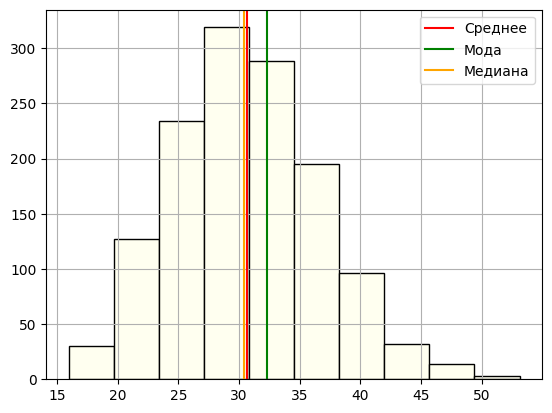

In [9]:
data['bmi'].hist(color = 'ivory', edgecolor = 'black')
plt.axvline(mean, color = 'red', label = 'Среднее')
plt.axvline(moda[0], color = 'green', label = 'Мода')
plt.axvline(med, color = 'orange', label = 'Медиана')
plt.legend()
plt.show()

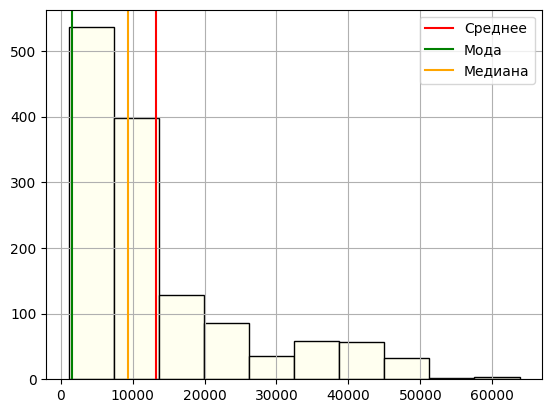

In [10]:
data['charges'].hist(color = 'ivory', edgecolor = 'black')
plt.axvline(mean1, color = 'red', label = 'Среднее')
plt.axvline(moda1[0], color = 'green', label = 'Мода')
plt.axvline(med1, color = 'orange', label = 'Медиана')
plt.legend()
plt.show()

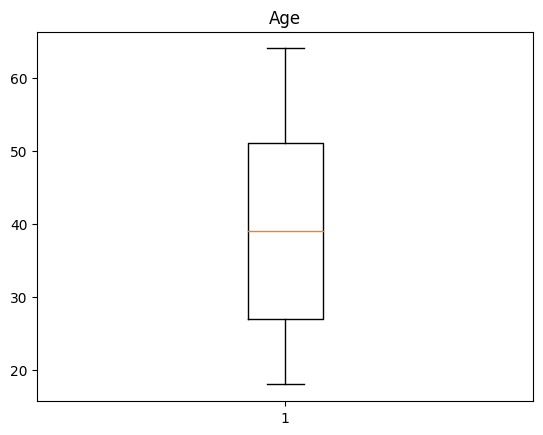

In [11]:
plt.boxplot(data['age'])
plt.title('Age')
plt.show()

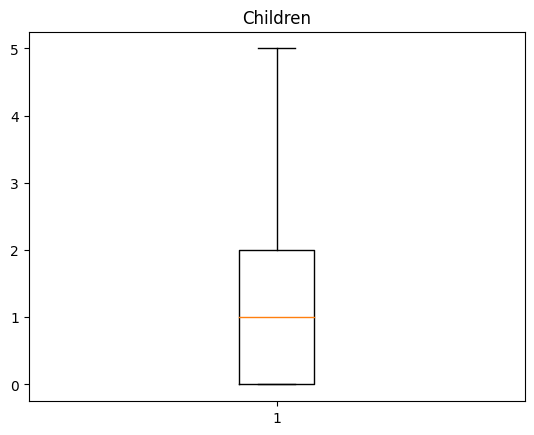

In [13]:
plt.boxplot(data['children'])
plt.title('Children')
plt.show()

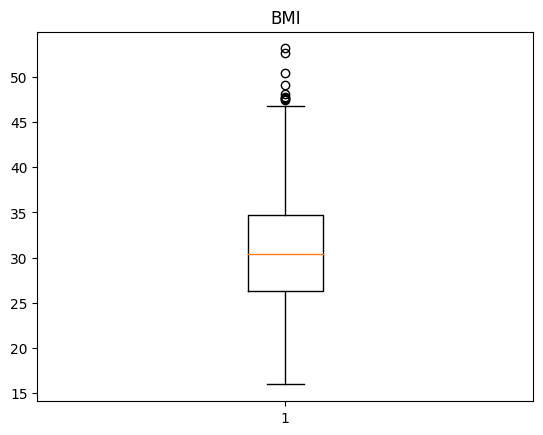

In [14]:
plt.boxplot(data['bmi'])
plt.title('BMI')
plt.show()

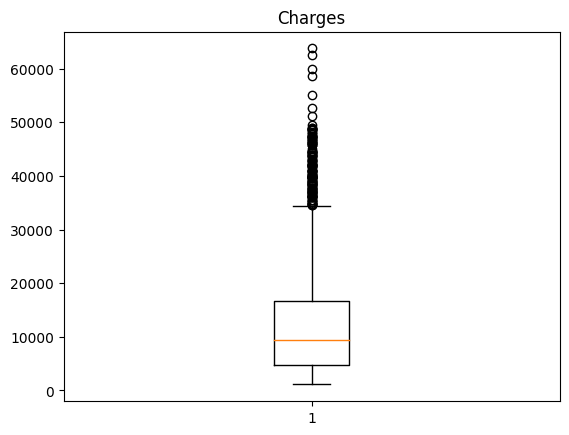

In [16]:
plt.boxplot(data['charges'])
plt.title('Charges')
plt.show()

Стандартное отклонение: 2226.6220428416163
реднее значение: 13265.737264056


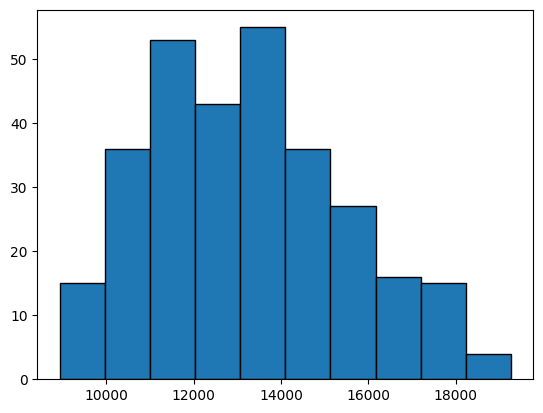

Стандартное отклонение: 957.327271978055
реднее значение: 13303.184079750512


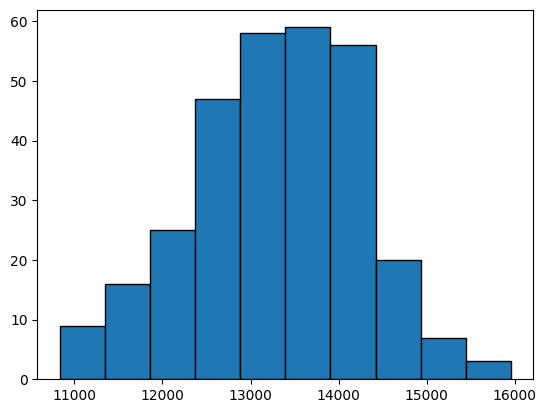

In [45]:
def cpt(stat, s_size):
    s_means = []
    
    for i in range(300):
        s = np.random.choice(stat, size = s_size, replace = False)
        s_mean = st.mean(s)
        s_means.append(s_mean)
    return s_means

charges_cpt = cpt(data['charges'].values, 30 )
print('Стандартное отклонение:', st.stdev(charges_cpt))
print('реднее значение:', st.mean(charges_cpt))
plt.hist(charges_cpt, edgecolor = 'k')
plt.show()

charges_cpt1 = cpt(data['charges'].values, 150 )
print('Стандартное отклонение:', st.stdev(charges_cpt1))
print('реднее значение:', st.mean(charges_cpt1))
plt.hist(charges_cpt1, edgecolor = 'k')
plt.show()

In [39]:
bmi_se = round(data['bmi'].std()/ sqrt(len(data)), 2)
print('95% Доверителей интервал bmi:', [round(data['bmi'].mean() - 1.96 * bmi_se, 2), 
                                        round(data['bmi'].mean() + 1.96 * bmi_se, 2)]),
print('92% Доверителей интервал bmi:', [round(data['bmi'].mean() - 2.58 * bmi_se, 2), 
                                        round(data['bmi'].mean() + 2.58 * bmi_se, 2)])

95% Доверителей интервал bmi: [30.33, 31.0]
92% Доверителей интервал bmi: [30.22, 31.1]


In [32]:
charges_se = round(data['charges'].std()/ sqrt(len(data)), 2)
print('95% Доверителей интервал charges:', [round(data['charges'].mean() - 1.96 * charges_se, 2), 
                                        round(data['charges'].mean() + 1.96 * charges_se, 2)]),
print('92% Доверителей интервал charges:', [round(data['charges'].mean() - 2.58 * charges_se, 2), 
                                        round(data['charges'].mean() + 2.58 * charges_se, 2)])

95% Доверителей интервал charges: [12621.53, 13919.32]
92% Доверителей интервал charges: [12416.26, 14124.58]


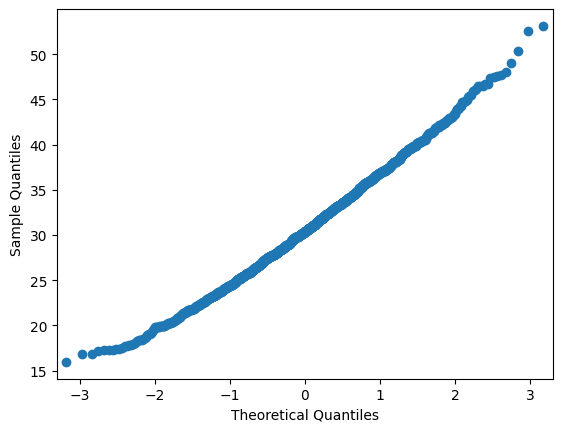

In [35]:
sm.qqplot(data['bmi'])
plt.show()

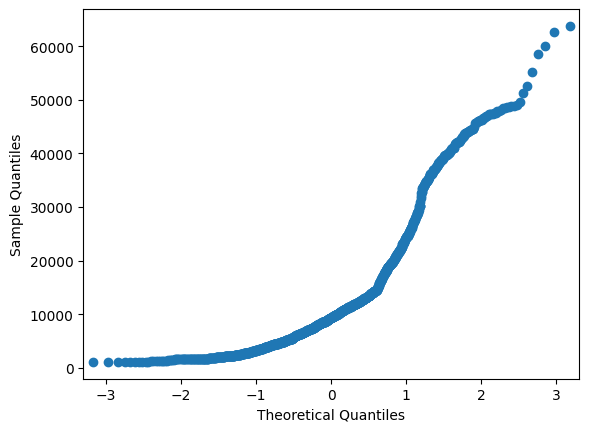

In [46]:
sm.qqplot(data['charges'])
plt.show()

In [50]:
for i in range(len(data['charges'])):
    x1 = []
    x2 = x1.append((data.loc[i]['charges'] - data['charges'].mean()) / data['charges'].std())
    
test_sk = kstest(x1, 'norm')
print('Тест Колмогорова-Смирнова для расходов:', test_sk)

Тест Колмогорова-Смирнова для расходов: KstestResult(statistic=0.9049973517857461, pvalue=0.19000529642850772)


In [51]:
for i in range(len(data['bmi'])):
    x1 = []
    x2 = x1.append((data.loc[i]['bmi'] - data['bmi'].mean()) / data['bmi'].std())
    
test_sk = kstest(x1, 'norm')
print('Тест Колмогорова-Смирнова для индекса массы тела:', test_sk)

Тест Колмогорова-Смирнова для индекса массы тела: KstestResult(statistic=0.6030656625214295, pvalue=0.7938686749571411)
